In [2]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report,balanced_accuracy_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
import string

%reload_ext autoreload
%autoreload 2
from utils import *

In [3]:
import pickle

train = pickle.load(open("../pickle/train.pickle", "rb"))
val = pickle.load(open("../pickle/val.pickle", "rb"))

In [4]:
train.head()

,tweet,target,lem
0,well how else will white ppl get forget our ...,1,well how else will white ppl get forget our ho...
1,funny thing isits not just the people doing i...,0,funny thing isits not just the people doing it...
2,nigga messed with the wrong bitch,0,nigga messed with the wrong bitch
3,bitch ass nigggaaa,0,bitch as nigggaaa
4,that real bitch,0,that real bitch


In [5]:
train.target.value_counts()

0    18686
1     1140
Name: target, dtype: int64

In [18]:
stop_words = set(stopwords.words('english'))
stop_list = [''.join(c for c in s if c not in string.punctuation) for s in stop_words]
train.lem = train['lem'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_list]))
train.head()

,tweet,target,lem
0,well how else will white ppl get forget our ...,1,well else white ppl get forget horrific past p...
1,funny thing isits not just the people doing i...,0,funny thing isits people people seeing pic jud...
2,nigga messed with the wrong bitch,0,nigga messed wrong bitch
3,bitch ass nigggaaa,0,bitch nigggaaa
4,that real bitch,0,real bitch


In [19]:
val.lem = val['lem'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_list]))
val.head()

,tweet,target,lem
0,got missed call from bitch,0,got missed call bitch
1,fucking with bad bitch you gone need some mon...,0,fucking bad bitch gone need money lil homie
2,lol credit aint where near good but know th...,0,lol credit aint near good know right man job n...
3,wipe the cum out them faggot contact lens wi...,0,wipe cum faggot contact lens wildin cant see shit
4,niggas cheat they bitch and dont expect pay ...,0,nigga cheat bitch expect pay back whatsoever y...


In [20]:
X_tr = train.lem
X_val = val.lem
y_tr = train.target
y_val = val.target

In [1]:
train

NameError: name 'train' is not defined

In [21]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

In [24]:
nb = MultinomialNB().fit(tfidf_tr, y_tr)
y_pr_nb_tr = nb.predict(tfidf_tr)
y_pr_nb_val = nb.predict(tfidf_val)

Training Accuracy:  0.9428023807121961
Validation Accuracy:  0.9414968731087351
Training F1 Score:  0.012195121951219513
Validation F1 Score:  0.0
Training AUC Score:  0.799123534647386
Validation AUC Score:  0.7049688569043098
Training Recall Score:  0.0061403508771929825
Validation Recall Score:  0.0
Training Precision Score:  0.875
Validation Precision Score:  0.0
Training Average Precision Score:  0.3088324780409356
Validation Average Precision Score:  0.16283262448260288


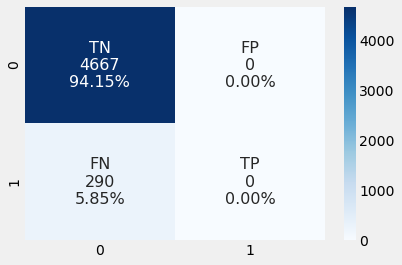

In [28]:
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_nb_tr, y_pr_nb_val, nb)

In [29]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_tr)
y_pr_rf_tr = rf.predict(tfidf_tr)
y_pr_rf_val = rf.predict(tfidf_val)


Training Accuracy:  0.9979824472914355
Validation Accuracy:  0.9412951381884204
Training F1 Score:  0.9825021872265967
Validation F1 Score:  0.19390581717451524
Training AUC Score:  0.99931863333277
Validation AUC Score:  0.8313141425858745
Training Recall Score:  0.9850877192982456
Validation Recall Score:  0.1206896551724138
Training Precision Score:  0.9799301919720768
Validation Precision Score:  0.49295774647887325
Training Average Precision Score:  0.9847158699721956
Validation Average Precision Score:  0.3136653830464763


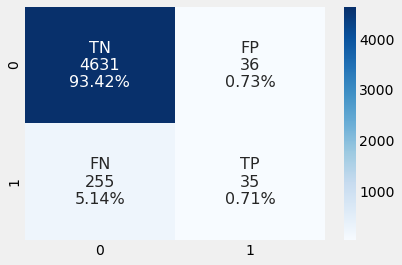

In [32]:
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_rf_tr, y_pr_rf_val, rf)

In [30]:
dt = DecisionTreeClassifier().fit(tfidf_tr, y_tr)
y_pr_dt_tr = dt.predict(tfidf_tr)
y_pr_dt_val = dt.predict(tfidf_val)

Training Accuracy:  0.9980328861091496
Validation Accuracy:  0.9215251159975791
Training F1 Score:  0.9829022358614642
Validation F1 Score:  0.29143897996357016
Training AUC Score:  0.9999496057654572
Validation AUC Score:  0.6185539702829108
Training Recall Score:  0.9833333333333333
Validation Recall Score:  0.27586206896551724
Training Precision Score:  0.9824715162138475
Validation Precision Score:  0.3088803088803089
Training Average Precision Score:  0.9989020100907339
Validation Average Precision Score:  0.12750985937945994


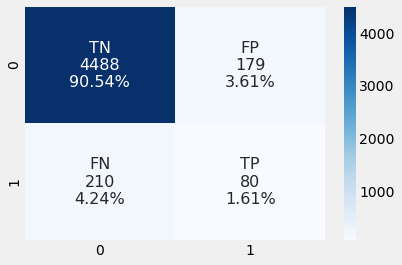

In [33]:
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_dt_tr, y_pr_dt_val, dt)

In [31]:
log = LogisticRegression().fit(tfidf_tr, y_tr)
y_pr_log_tr = log.predict(tfidf_tr)
y_pr_log_val = log.predict(tfidf_val)

Training Accuracy:  0.9486532835670332
Validation Accuracy:  0.9412951381884204
Training F1 Score:  0.25584795321637427
Validation F1 Score:  0.18487394957983194
Training AUC Score:  0.950024387335673
Validation AUC Score:  0.8704210782973628
Training Recall Score:  0.15350877192982457
Validation Recall Score:  0.11379310344827587
Training Precision Score:  0.7675438596491229
Validation Precision Score:  0.4925373134328358
Training Average Precision Score:  0.5826117025159812
Validation Average Precision Score:  0.3497021490008816


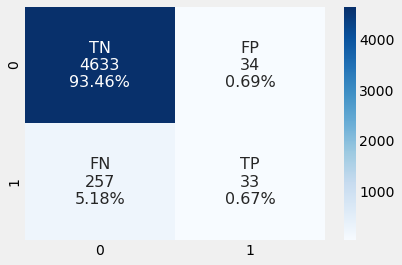

In [34]:
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_log_tr, y_pr_log_val, log)